In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
df=pd.read_csv("Credit_data.csv")

In [3]:
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
df.isnull().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

In [6]:
df['zip']

0          28654
1          99160
2          83252
3          59632
4          24433
           ...  
1296670    84735
1296671    21790
1296672    88325
1296673    57756
1296674    59871
Name: zip, Length: 1296675, dtype: int64

In [7]:
drop_columns=['Unnamed: 0','first','last','city','gender','street','lat','long','zip','merchant','merch_lat','merch_long'
,'merch_zipcode']

In [8]:
df.drop(columns=drop_columns,inplace=True)

In [9]:
df.head(5)

,trans_date_trans_time,cc_num,category,amt,state,city_pop,job,dob,trans_num,unix_time,is_fraud
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,NC,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,WA,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,ID,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,MT,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,0
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,VA,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   category               1296675 non-null  object 
 3   amt                    1296675 non-null  float64
 4   state                  1296675 non-null  object 
 5   city_pop               1296675 non-null  int64  
 6   job                    1296675 non-null  object 
 7   dob                    1296675 non-null  object 
 8   trans_num              1296675 non-null  object 
 9   unix_time              1296675 non-null  int64  
 10  is_fraud               1296675 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 108.8+ MB


In [11]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [12]:
df.rename(columns={'trans_date_trans_time':'Transaction Time'},inplace=True)
df.rename(columns={'cc_num':'Credit Card Number'},inplace=True)
df.rename(columns={'amt': 'Amount'},inplace=True)
df.rename(columns={'is_fraud':'Fraud'},inplace=True)
df.rename(columns={'unix_time':'Unix Time'},inplace=True)

In [13]:
df.tail(5)

,Transaction Time,Credit Card Number,category,Amount,state,city_pop,job,dob,trans_num,Unix Time,Fraud
1296670,2020-06-21 12:12:08,30263540414123,entertainment,15.56,UT,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,0
1296671,2020-06-21 12:12:19,6011149206456997,food_dining,51.70,MD,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,0
1296672,2020-06-21 12:12:32,3514865930894695,food_dining,105.93,NM,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,0
1296673,2020-06-21 12:13:36,2720012583106919,food_dining,74.90,SD,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,0
1296674,2020-06-21 12:13:37,4292902571056973207,food_dining,4.30,MT,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,0


In [14]:
df.head(5)

,Transaction Time,Credit Card Number,category,Amount,state,city_pop,job,dob,trans_num,Unix Time,Fraud
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,NC,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,WA,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,ID,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,MT,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,0
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,VA,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,0


In [15]:
df.shape

(1296675, 11)

In [16]:
df.isnull().sum()

Transaction Time      0
Credit Card Number    0
category              0
Amount                0
state                 0
city_pop              0
job                   0
dob                   0
trans_num             0
Unix Time             0
Fraud                 0
dtype: int64

In [17]:
df['category'].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

<Axes: xlabel='Fraud', ylabel='Amount'>

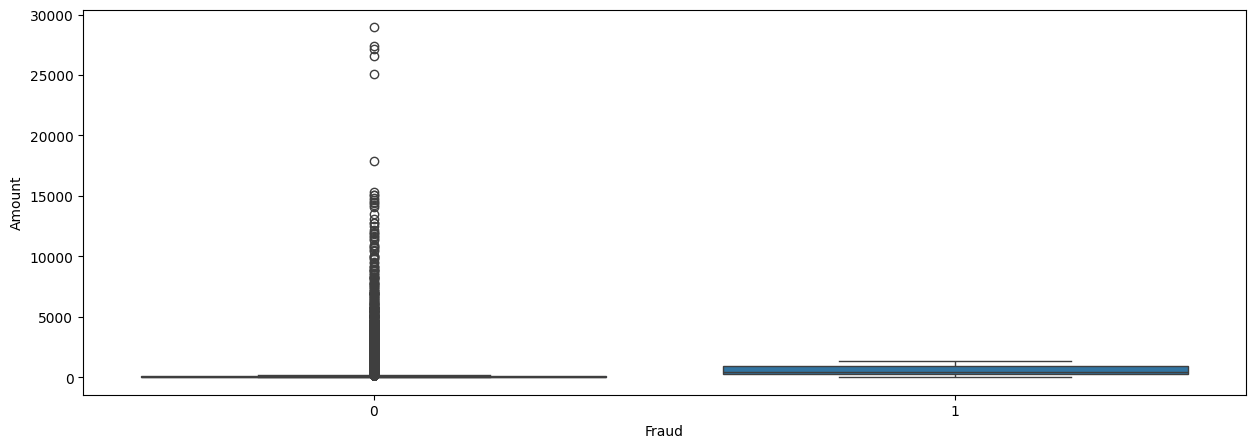

In [18]:
import seaborn as sns
figsize=(15,5)
plt.figure(figsize=figsize)
sns.boxplot(x='Fraud', y='Amount', data=df)

In [19]:
df.head(5)

,Transaction Time,Credit Card Number,category,Amount,state,city_pop,job,dob,trans_num,Unix Time,Fraud
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,NC,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,WA,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,ID,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,MT,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,0
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,VA,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,0


In [20]:
#Transaction Frequency: Count transactions per user
df['Transaction_Frequency'] = df.groupby('Credit Card Number')['Amount'].transform('count')

In [21]:
#Average Transaction Amount: Calculate the average transaction amount per user
df['Average_Transaction_Amount'] = df.groupby('Credit Card Number')['Amount'].transform('mean')

In [22]:
df['Transaction_Hour'] = pd.to_datetime(df['Transaction Time']).dt.hour

In [23]:
df.head()

,Transaction Time,Credit Card Number,category,Amount,state,city_pop,job,dob,trans_num,Unix Time,Fraud,Transaction_Frequency,Average_Transaction_Amount,Transaction_Hour
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,NC,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0,2028,87.393215,0
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,WA,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0,3030,53.949320,0
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,ID,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,503,65.870040,0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,MT,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,0,493,72.776673,0
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,VA,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,0,2017,95.178091,0


In [24]:
df.shape

(1296675, 14)

In [25]:
df.Transaction_Hour.value_counts()

Transaction_Hour
23    67104
22    66982
18    66051
16    65726
21    65533
19    65508
17    65450
15    65391
13    65314
12    65257
20    65098
14    64885
1     42869
3     42769
2     42656
8     42505
0     42502
6     42300
10    42271
7     42203
9     42185
5     42171
11    42082
4     41863
Name: count, dtype: int64

In [26]:
df['Credit Card Number'].value_counts()

Credit Card Number
571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
180097223252063           7
4225628813173670          7
501894933032              7
4975457191020             7
340187018810220           7
Name: count, Length: 983, dtype: int64

In [27]:
df.Transaction_Frequency.isnull().sum()

0

In [28]:
df[df['Credit Card Number']==4975457191020]         

,Transaction Time,Credit Card Number,category,Amount,state,city_pop,job,dob,trans_num,Unix Time,Fraud,Transaction_Frequency,Average_Transaction_Amount,Transaction_Hour
601833,2019-09-13 00:00:19,4975457191020,grocery_pos,283.57,VA,242803,Sales promotion account executive,1963-02-20,07ad085e20d0816ed86f27c8b15ad583,1347494419,1,7,572.678571,0
602016,2019-09-13 02:48:27,4975457191020,grocery_pos,309.49,VA,242803,Sales promotion account executive,1963-02-20,a48926e79d20c8b75487e7714c914472,1347504507,1,7,572.678571,2
603722,2019-09-13 23:49:51,4975457191020,misc_net,785.11,VA,242803,Sales promotion account executive,1963-02-20,781e6254022a16153c2616bda565a269,1347580191,1,7,572.678571,23
603724,2019-09-13 23:52:43,4975457191020,home,221.78,VA,242803,Sales promotion account executive,1963-02-20,d244c40c8f506759e48edef7d74d69b2,1347580363,1,7,572.678571,23
604845,2019-09-14 12:32:16,4975457191020,misc_net,738.74,VA,242803,Sales promotion account executive,1963-02-20,8112c0a83b023acedd611a14bc3503a0,1347625936,1,7,572.678571,12
605601,2019-09-14 18:06:25,4975457191020,shopping_net,831.00,VA,242803,Sales promotion account executive,1963-02-20,7fc0c0492d4da656f9718f0fd578557a,1347645985,1,7,572.678571,18
606286,2019-09-14 22:52:27,4975457191020,shopping_net,839.06,VA,242803,Sales promotion account executive,1963-02-20,a191fb5b19bd0a5abcde5eb01e6ac350,1347663147,1,7,572.678571,22


In [29]:
import os
from datetime import datetime
year=datetime.now().year
#df['User_age']=df['dob'].apply(lambda x: year-int(x.split('-')[0]))
df['User_age'] = year - pd.to_datetime(df['dob']).dt.year


In [30]:
df.head()

,Transaction Time,Credit Card Number,category,Amount,state,city_pop,job,dob,trans_num,Unix Time,Fraud,Transaction_Frequency,Average_Transaction_Amount,Transaction_Hour,User_age
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,NC,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0,2028,87.393215,0,37
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,WA,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0,3030,53.949320,0,47
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,ID,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,503,65.870040,0,63
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,MT,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,0,493,72.776673,0,58
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,VA,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,0,2017,95.178091,0,39


In [31]:
#Calculate the transaction frequency for per hour
df['transaction_per_hour']=df.groupby(['Transaction_Hour','Credit Card Number'])['Amount'].transform('count')

In [32]:
df.head()

,Transaction Time,Credit Card Number,category,Amount,state,city_pop,job,dob,trans_num,Unix Time,Fraud,Transaction_Frequency,Average_Transaction_Amount,Transaction_Hour,User_age,transaction_per_hour
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,NC,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0,2028,87.393215,0,37,49
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,WA,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0,3030,53.949320,0,47,75
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,ID,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,503,65.870040,0,63,24
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,MT,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,0,493,72.776673,0,58,17
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,VA,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,0,2017,95.178091,0,39,76


In [33]:
df.columns

Index(['Transaction Time', 'Credit Card Number', 'category', 'Amount', 'state',
       'city_pop', 'job', 'dob', 'trans_num', 'Unix Time', 'Fraud',
       'Transaction_Frequency', 'Average_Transaction_Amount',
       'Transaction_Hour', 'User_age', 'transaction_per_hour'],
      dtype='object')

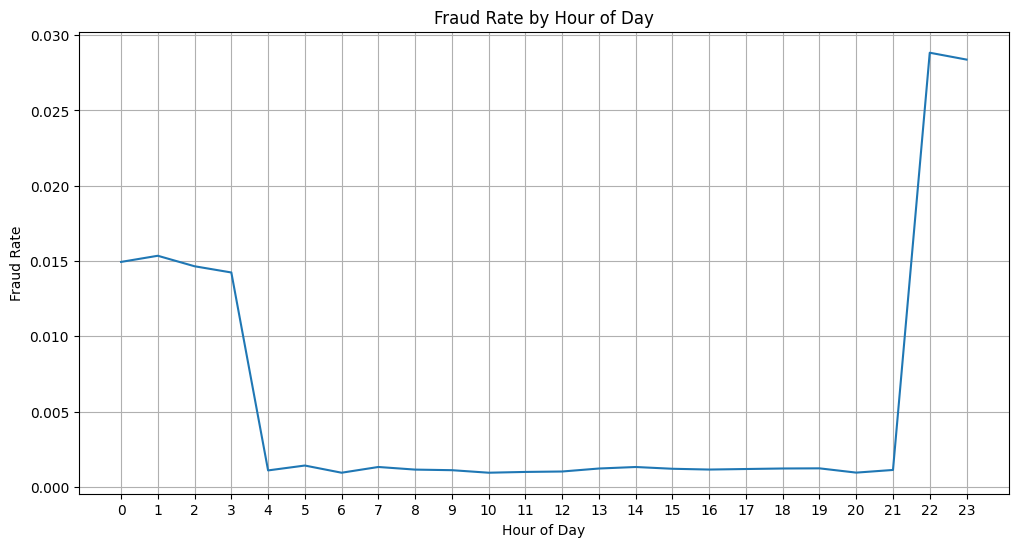

In [34]:
#This graph shows you at which hours fraud is more likely, normalized as a rate (percentage of transactions that are fraud at that hour).
hourly_fraud = df.groupby('Transaction_Hour')['Fraud'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_fraud.index, y=hourly_fraud.values)
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Hour of Day')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


In [35]:
df['Odd_Hour'] = df['Transaction_Hour'].apply(lambda x: 1 if x < 6 or x == 0 else 0)


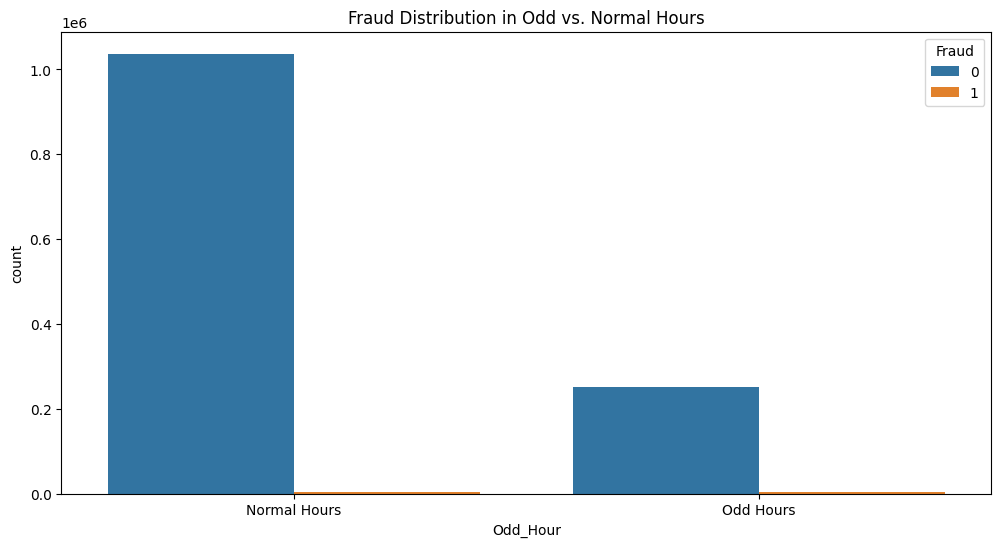

In [36]:
#Check fraud distribution across odd vs. normal hours:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(x='Odd_Hour', hue='Fraud', data=df)
plt.title('Fraud Distribution in Odd vs. Normal Hours')
plt.xticks([0, 1], ['Normal Hours', 'Odd Hours'])
plt.show()


In [37]:
df.head()

,Transaction Time,Credit Card Number,category,Amount,state,city_pop,job,dob,trans_num,Unix Time,Fraud,Transaction_Frequency,Average_Transaction_Amount,Transaction_Hour,User_age,transaction_per_hour,Odd_Hour
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,NC,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,0,2028,87.393215,0,37,49,1
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,WA,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,0,3030,53.949320,0,47,75,1
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,ID,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,503,65.870040,0,63,24,1
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,MT,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,0,493,72.776673,0,58,17,1
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,VA,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,0,2017,95.178091,0,39,76,1


In [38]:
df1=df.drop(columns=['Transaction Time','dob','Unix Time','Transaction_Hour','Amount','Odd_Hour','city_pop','trans_num']).reset_index(drop=True)

In [39]:
df1.head()

,Credit Card Number,category,state,job,Fraud,Transaction_Frequency,Average_Transaction_Amount,User_age,transaction_per_hour
0,2703186189652095,misc_net,NC,"Psychologist, counselling",0,2028,87.393215,37,49
1,630423337322,grocery_pos,WA,Special educational needs teacher,0,3030,53.949320,47,75
2,38859492057661,entertainment,ID,Nature conservation officer,0,503,65.870040,63,24
3,3534093764340240,gas_transport,MT,Patent attorney,0,493,72.776673,58,17
4,375534208663984,misc_pos,VA,Dance movement psychotherapist,0,2017,95.178091,39,76


In [40]:
df1.columns

Index(['Credit Card Number', 'category', 'state', 'job', 'Fraud',
       'Transaction_Frequency', 'Average_Transaction_Amount', 'User_age',
       'transaction_per_hour'],
      dtype='object')

In [41]:
df1.describe()

,Credit Card Number,Fraud,Transaction_Frequency,Average_Transaction_Amount,User_age,transaction_per_hour
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,5.788652e-03,1.818725e+03,7.035104e+01,5.174255e+01,8.637984e+01
std,1.308806e+18,7.586269e-02,7.425057e+02,1.941029e+01,1.737848e+01,4.853238e+01
min,6.041621e+10,0.000000e+00,7.000000e+00,4.295167e+01,2.000000e+01,1.000000e+00
25%,1.800429e+14,0.000000e+00,1.466000e+03,5.981365e+01,3.800000e+01,5.100000e+01
50%,3.521417e+15,0.000000e+00,2.000000e+03,6.509374e+01,5.000000e+01,7.600000e+01
75%,4.642255e+15,0.000000e+00,2.524000e+03,8.327758e+01,6.300000e+01,1.140000e+02
max,4.992346e+18,1.000000e+00,3.123000e+03,9.488182e+02,1.010000e+02,2.450000e+02


In [42]:
df1.drop(columns=['job'],inplace=True)

In [43]:
#Fraud detection using Classifier Model
features=[
    'category', 'state',
       'Transaction_Frequency', 'Average_Transaction_Amount', 'User_age',
       'transaction_per_hour']
target = 'Fraud'
X_fraud=df1[features]
y_fraud=df1[target]

# OneHotEncoding and StandardScaler
cat_featue=s=['category', 'state']
numeical_features=list(set(features)-set(cat_featue))

In [44]:
X_fraud,X_fraud_test,y_fraud,y_fraud_test=train_test_split(X_fraud,y_fraud,test_size=0.2,random_state=42,stratify=y_fraud)

In [45]:
X_fraud.shape,y_fraud.shape,X_fraud_test.shape,y_fraud_test.shape

((1037340, 6), (1037340,), (259335, 6), (259335,))

In [46]:
preprocessor=ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeical_features),
        ('cat',OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_featue)
    ]

)

In [47]:
print(X_fraud.columns.tolist())

['category', 'state', 'Transaction_Frequency', 'Average_Transaction_Amount', 'User_age', 'transaction_per_hour']


In [48]:
X_fraud_preprocessed=preprocessor.fit_transform(X_fraud)
X_fraud_test_preprocessed=preprocessor.transform(X_fraud_test)

In [49]:
#Apply SMOTE to balance the dataset
smote=SMOTE(random_state=42)
X_fraud_resampled, y_fraud_resampled=smote.fit_resample(X_fraud_preprocessed, y_fraud)

In [50]:
model=RandomForestClassifier(random_state=42,class_weight='balanced')
model.fit(X_fraud_resampled, y_fraud_resampled)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [51]:
y_predict=model.predict(X_fraud_test_preprocessed)
print(classification_report(y_fraud_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.27      0.30      0.29      1501

    accuracy                           0.99    259335
   macro avg       0.63      0.65      0.64    259335
weighted avg       0.99      0.99      0.99    259335



In [52]:
cm=confusion_matrix(y_fraud_test, y_predict)
print(cm)

[[256631   1203]
 [  1049    452]]


In [53]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_fraud_test, y_predict)

In [54]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [55]:
# Step 1: Import necessary libraries
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# Step 2: Create and train the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fit the model on resampled data (X_resampled)
iso_forest.fit(X_fraud_resampled)

# Step 3: Predict the anomalies (fraudulent transactions)
# -1 indicates anomaly (fraud), 1 indicates normal
y_pred = iso_forest.predict(X_fraud_resampled)

# Step 4: Convert the predicted labels to a binary format (0 for normal, 1 for fraud)
# In the context of anomaly detection, -1 is considered as anomaly, 1 is normal
y_pred = [1 if label == -1 else 0 for label in y_pred]

# Step 5: Evaluate the model (assuming you have ground truth labels, like y_fraud_resampled)
print("Classification Report for Isolation Forest Model:")
print(classification_report(y_fraud_resampled, y_pred))




Classification Report for Isolation Forest Model:
              precision    recall  f1-score   support

           0       0.50      0.99      0.66   1031335
           1       0.40      0.01      0.02   1031335

    accuracy                           0.50   2062670
   macro avg       0.45      0.50      0.34   2062670
weighted avg       0.45      0.50      0.34   2062670



In [56]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

kmeans_pipeline = make_pipeline(preprocessor, KMeans(n_clusters=4, random_state=42))
cluster_labels = kmeans_pipeline.fit_predict(df1[features])
df1['Customer_Segment'] = cluster_labels


In [57]:
df1['Customer_Segment'].value_counts



<bound method IndexOpsMixin.value_counts of 0          1
1          0
2          2
3          2
4          1
          ..
1296670    2
1296671    1
1296672    2
1296673    1
1296674    1
Name: Customer_Segment, Length: 1296675, dtype: int32>

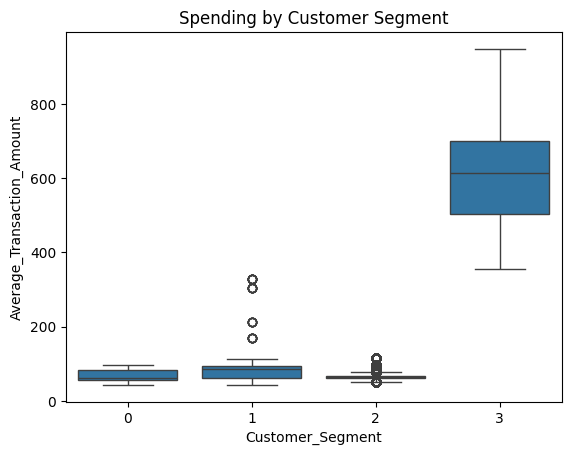

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Customer_Segment', y='Average_Transaction_Amount', data=df1)
plt.title("Spending by Customer Segment")
plt.show()


In [60]:
features

['category',
 'state',
 'Transaction_Frequency',
 'Average_Transaction_Amount',
 'User_age',
 'transaction_per_hour']

<Axes: xlabel='Customer_Segment'>

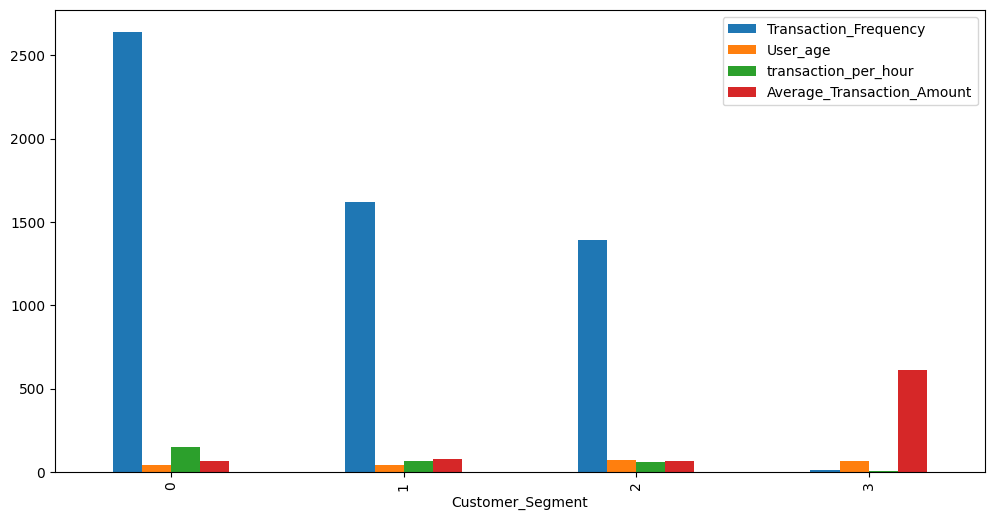

In [61]:
df1.groupby('Customer_Segment')[numeical_features].mean().plot(kind='bar', figsize=(12, 6))